Saving th lab5.jpeg to th lab5 (2).jpeg
Original Image Size: 20.72 KB
JPEG Compressed Size: 11.03 KB
PNG Compressed Size: 185.67 KB


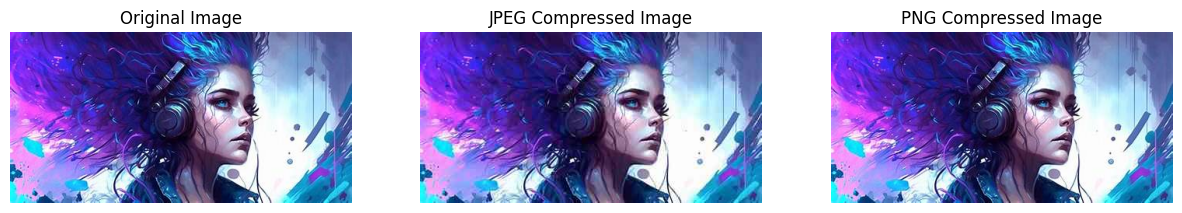

In [2]:
#E22CSEU1088
#P.Pratheek Reddy
import cv2
import numpy as np
from PIL import Image
import io
import os

from google.colab import files
uploaded = files.upload()

filename = list(uploaded.keys())[0]

image = cv2.imread(filename)


image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

original_size = os.path.getsize(filename) / 1024
print(f"Original Image Size: {original_size:.2f} KB")


jpeg_filename = "compressed_image.jpg"
cv2.imwrite(jpeg_filename, image, [cv2.IMWRITE_JPEG_QUALITY, 30])


jpeg_size = os.path.getsize(jpeg_filename) / 1024
print(f"JPEG Compressed Size: {jpeg_size:.2f} KB")


png_filename = "compressed_image.png"
cv2.imwrite(png_filename, image, [cv2.IMWRITE_PNG_COMPRESSION, 9])


png_size = os.path.getsize(png_filename) / 1024
print(f"PNG Compressed Size: {png_size:.2f} KB")


import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 3, figsize=(15,5))


ax[0].imshow(image_rgb)
ax[0].set_title("Original Image")
ax[0].axis("off")


jpeg_img = Image.open(jpeg_filename)
ax[1].imshow(jpeg_img)
ax[1].set_title("JPEG Compressed Image")
ax[1].axis("off")


png_img = Image.open(png_filename)
ax[2].imshow(png_img)
ax[2].set_title("PNG Compressed Image")
ax[2].axis("off")

plt.show()


In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape to match CNN input (28x28 images with 1 channel)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# One-hot encode labels
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [4]:
# Define CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3,3), strides=2, activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), strides=2, activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
history = model.fit(x_train, y_train, epochs=15, batch_size=128, validation_split=0.2)


Epoch 1/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6510 - loss: 1.1541 - val_accuracy: 0.9292 - val_loss: 0.2244
Epoch 2/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9408 - loss: 0.2002 - val_accuracy: 0.9544 - val_loss: 0.1470
Epoch 3/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9582 - loss: 0.1396 - val_accuracy: 0.9650 - val_loss: 0.1190
Epoch 4/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9663 - loss: 0.1122 - val_accuracy: 0.9679 - val_loss: 0.1063
Epoch 5/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9719 - loss: 0.0951 - val_accuracy: 0.9676 - val_loss: 0.1034
Epoch 6/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9739 - loss: 0.0853 - val_accuracy: 0.9712 - val_loss: 0.0918
Epoch 7/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9751 - loss: 0.0809 - val_accuracy: 0.9748 - val_loss: 0.0815
Epoch 8/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9773 - loss: 0.0729 - val_accuracy: 0.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


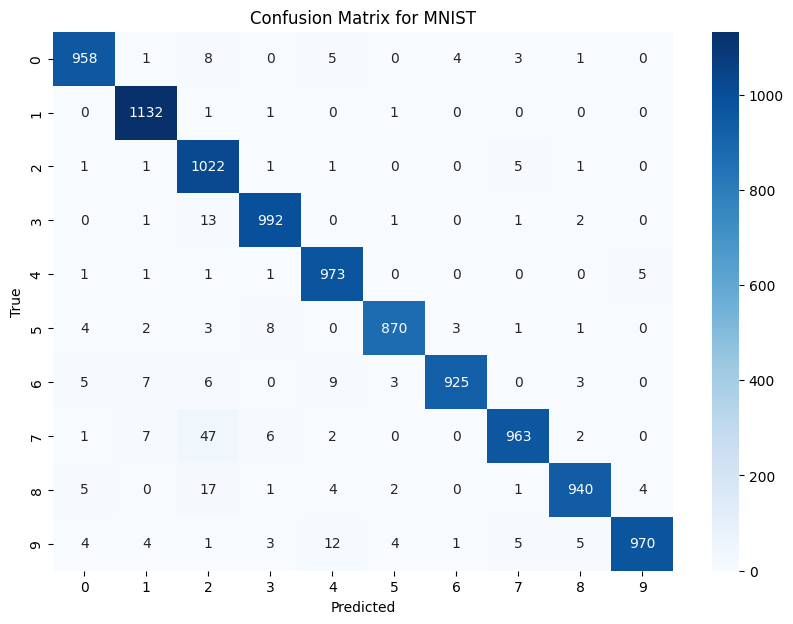

AUC Score: 0.9996


In [6]:
# Predictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Model Evaluation
accuracy = np.mean(y_pred_classes == y_true)
precision = classification_report(y_true, y_pred_classes, output_dict=True)['weighted avg']['precision']
recall = classification_report(y_true, y_pred_classes, output_dict=True)['weighted avg']['recall']
f1_score = classification_report(y_true, y_pred_classes, output_dict=True)['weighted avg']['f1-score']

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for MNIST')
plt.show()

# ROC Curve & AUC
auc_score = roc_auc_score(y_test, y_pred, multi_class='ovr')
print(f"AUC Score: {auc_score:.4f}")


In [7]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# One-hot encode labels
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


In [8]:

model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes
])


model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:

history = model.fit(x_train, y_train, epochs=15, batch_size=128, validation_split=0.2)


Epoch 1/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.2805 - loss: 1.9265 - val_accuracy: 0.4791 - val_loss: 1.4571
Epoch 2/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4986 - loss: 1.3928 - val_accuracy: 0.5473 - val_loss: 1.2964
Epoch 3/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5645 - loss: 1.2193 - val_accuracy: 0.5947 - val_loss: 1.1545
Epoch 4/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6097 - loss: 1.1071 - val_accuracy: 0.6233 - val_loss: 1.0798
Epoch 5/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6528 - loss: 1.0023 - val_accuracy: 0.6325 - val_loss: 1.0510
Epoch 6/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6731 - loss: 0.9425 - val_accuracy: 0.6503 - val_loss: 1.0045
Epoch 7/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6906 - loss: 0.8835 - val_accuracy: 0.6596 - val_loss: 0.9872
Epoch 8/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7104 - loss: 0.8351 - val_accuracy: 0

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


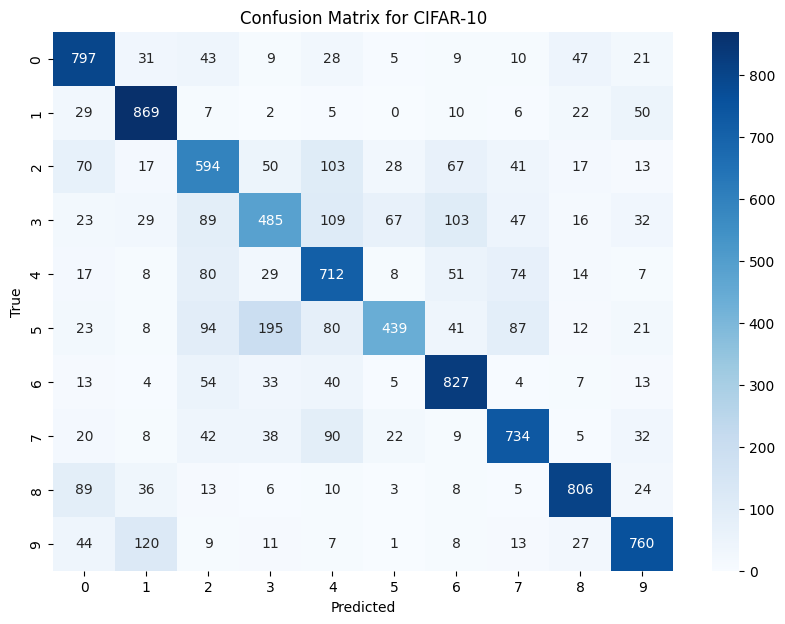

AUC Score: 0.9542


In [10]:

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)


accuracy = np.mean(y_pred_classes == y_true)
precision = classification_report(y_true, y_pred_classes, output_dict=True)['weighted avg']['precision']
recall = classification_report(y_true, y_pred_classes, output_dict=True)['weighted avg']['recall']
f1_score = classification_report(y_true, y_pred_classes, output_dict=True)['weighted avg']['f1-score']


conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for CIFAR-10')
plt.show()


auc_score = roc_auc_score(y_test, y_pred, multi_class='ovr')
print(f"AUC Score: {auc_score:.4f}")
